<a href="https://colab.research.google.com/github/Felipepa9/MADSI/blob/main/SECCION_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CARGA Y PREPARACIÓN DEL DATASET

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.rcParams['figure.figsize'] = [12, 6]
plt.rcParams['font.size'] = 12
plt.style.use('seaborn-v0_8-whitegrid')

In [2]:
data_raw = pd.read_csv('/content/drive/MyDrive/MOD. Y SIST. INTELIGENTES/SECCION_3.csv')
data_raw.head()

,flight_date,maximum_payload_kg_qty
0,2022-01-01,18218
1,2022-01-29,17745
2,2022-03-24,17558
3,2022-05-18,14141
4,2022-07-30,18006


In [3]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   flight_date             64964 non-null  object
 1   maximum_payload_kg_qty  64964 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1015.2+ KB


In [4]:
data_raw['flight_date'] = pd.to_datetime(data_raw['flight_date'])

In [5]:
data_sorted = data_raw.sort_values(by='flight_date', ascending=True)
data_sorted.head()

,flight_date,maximum_payload_kg_qty
0,2022-01-01,18218
5183,2022-01-01,17028
20281,2022-01-01,17278
19629,2022-01-01,19228
57268,2022-01-01,15728


In [6]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64964 entries, 0 to 64963
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   flight_date             64964 non-null  datetime64[ns]
 1   maximum_payload_kg_qty  64964 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1015.2 KB


In [7]:
# prompt: Promedia maximum_payload_kg_qty por día según flight_date y dame el valor en entero y llamalo df

df = data_sorted.groupby('flight_date')['maximum_payload_kg_qty'].mean().reset_index()
df['maximum_payload_kg_qty'] = df['maximum_payload_kg_qty'].astype(int)
df.head()

,flight_date,maximum_payload_kg_qty
0,2022-01-01,17155
1,2022-01-02,16905
2,2022-01-03,16892
3,2022-01-04,16907
4,2022-01-05,16863


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   flight_date             1096 non-null   datetime64[ns]
 1   maximum_payload_kg_qty  1096 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.3 KB


In [9]:
df.set_index('flight_date', inplace=True)

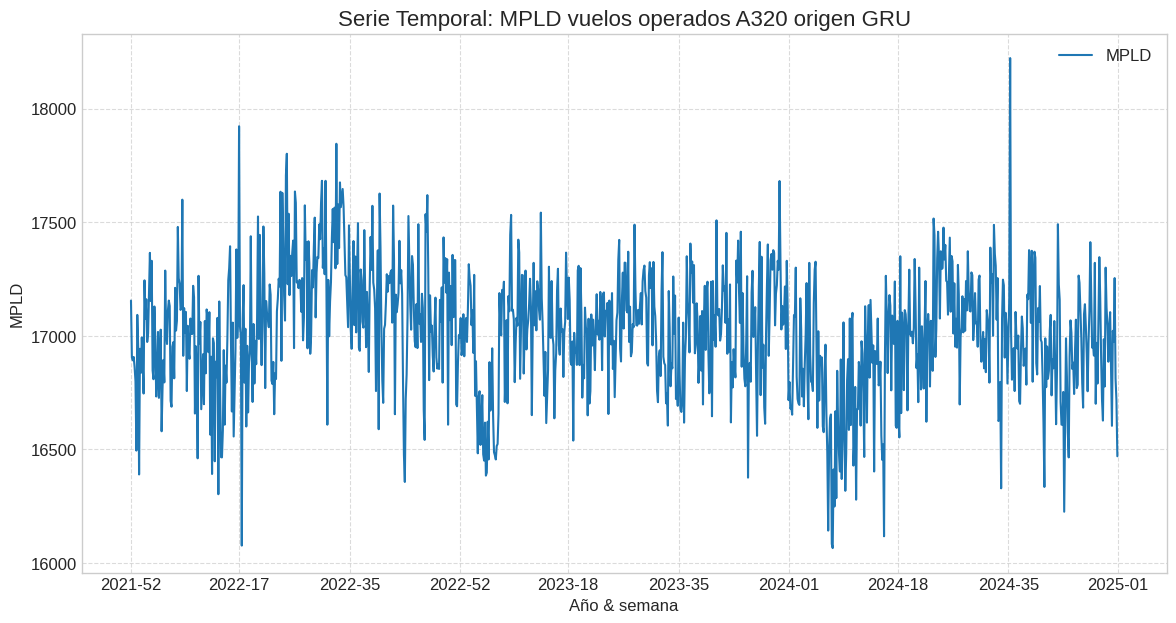

In [10]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['maximum_payload_kg_qty'], label='MPLD')
plt.title('Serie Temporal: MPLD vuelos operados A320 origen GRU', fontsize=16)
plt.xlabel('Año & semana', fontsize=12)
plt.ylabel('MPLD', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%G-%V'))
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator()) # Use AutoDateLocator for better spacing
plt.show()

3.4 Detección de Outliers con Bandas Estadísticas Móviles en maximum_payload_kg_qty


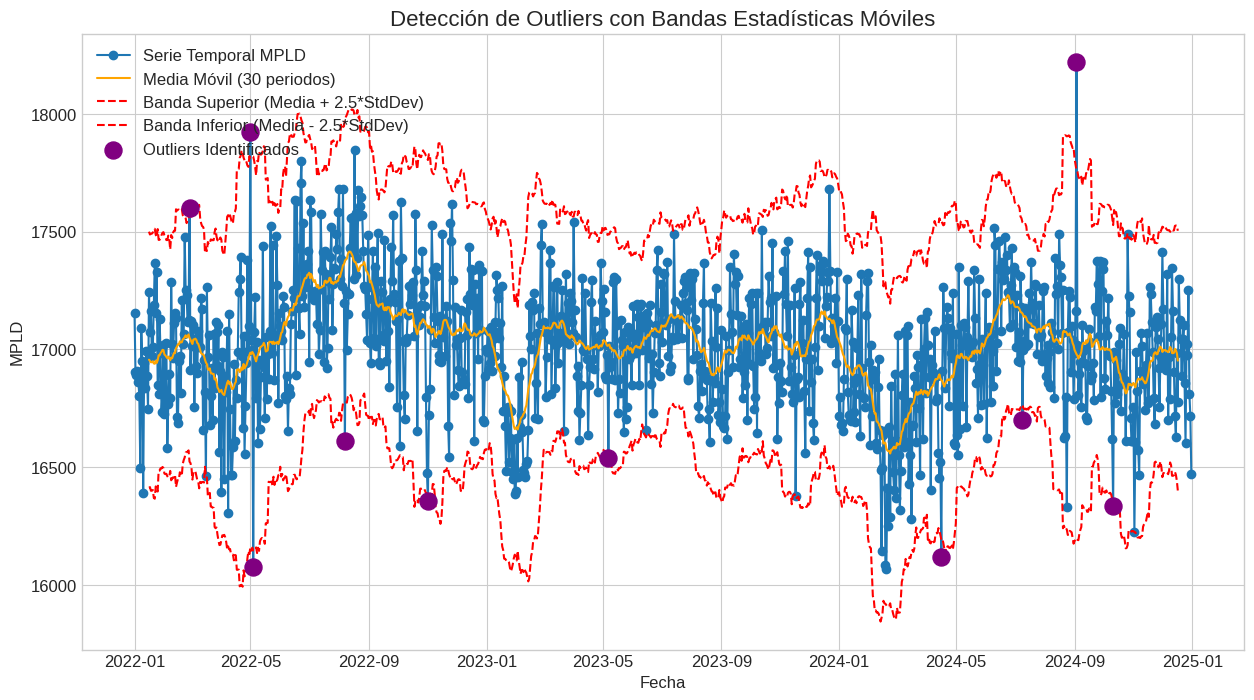


Outliers identificados:
             maximum_payload_kg_qty
flight_date                        
2022-02-27                    17599
2022-05-01                    17922
2022-05-04                    16077
2022-08-07                    16609
2022-11-01                    16357
2023-05-07                    16539
2024-04-16                    16118
2024-07-09                    16698
2024-09-03                    18222
2024-10-11                    16335

Original DataFrame shape: (1096, 1)
Cleaned DataFrame shape: (1086, 1)


,maximum_payload_kg_qty
flight_date,
2022-01-01,17155
2022-01-02,16905
2022-01-03,16892
2022-01-04,16907
2022-01-05,16863


In [11]:
if not df.empty and 'maximum_payload_kg_qty' in df.columns:
    print("3.4 Detección de Outliers con Bandas Estadísticas Móviles en maximum_payload_kg_qty")
    df_outliers = df.copy()

    # Calcular bandas estadísticas móviles
    window_size = 30 # Using a window size of 30 for rolling statistics
    rolling_mean = df_outliers['maximum_payload_kg_qty'].rolling(window=window_size, center=True).mean()
    rolling_std = df_outliers['maximum_payload_kg_qty'].rolling(window=window_size, center=True).std()

    # Definir umbrales (e.g., Media +/- k*StdDev)
    k = 2.5 # Factor k for the bands
    upper_bound = rolling_mean + (k * rolling_std)
    lower_bound = rolling_mean - (k * rolling_std)

    # Identify outliers
    identified_outliers = df_outliers[(df_outliers['maximum_payload_kg_qty'] > upper_bound) | (df_outliers['maximum_payload_kg_qty'] < lower_bound)]

    plt.figure(figsize=(15, 8))
    plt.plot(df_outliers.index, df_outliers['maximum_payload_kg_qty'], label='Serie Temporal MPLD', marker='o', linestyle='-')
    plt.plot(rolling_mean.index, rolling_mean, label=f'Media Móvil ({window_size} periodos)', color='orange')
    plt.plot(upper_bound.index, upper_bound, label=f'Banda Superior (Media + {k}*StdDev)', color='red', linestyle='--')
    plt.plot(lower_bound.index, lower_bound, label=f'Banda Inferior (Media - {k}*StdDev)', color='red', linestyle='--')

    if not identified_outliers.empty:
        plt.scatter(identified_outliers.index, identified_outliers['maximum_payload_kg_qty'], color='purple', s=150, zorder=5, label='Outliers Identificados')

    plt.title('Detección de Outliers con Bandas Estadísticas Móviles', fontsize=16)
    plt.xlabel('Fecha')
    plt.ylabel('MPLD')
    plt.legend(loc='upper left')
    plt.show()

    print("\nOutliers identificados:")
    if not identified_outliers.empty:
        print(identified_outliers)
    else:
        print("No se identificaron outliers con los criterios actuales.")

else:
    print("DataFrame vacío o sin columna 'maximum_payload_kg_qty', saltando detección de outliers.")

# Remove the identified outliers from the df DataFrame
df_cleaned = df.drop(identified_outliers.index)

print("\nOriginal DataFrame shape:", df.shape)
print("Cleaned DataFrame shape:", df_cleaned.shape)

# Display the first few rows of the cleaned DataFrame
display(df_cleaned.head())

APLICACIÓN DE RNN CON KERAS

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import os
import datetime
import math

gpus = tf.config.list_physical_devices('GPU')

if gpus:
    print(f"\nUsando dispositivo: GPU ({len(gpus)} GPUs disponibles)")

else:
    print("\nUsando dispositivo: CPU")